In [81]:
import pandas as pd
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as plt
from pandas.tools import plotting
import seaborn as sns
import scipy


In [28]:
df_train_values= pd.read_csv(r'G:\My Drive\Graduate life at UA\Other\DataDriven\HeartDisease\data\train_values.csv')
df_train_labels= pd.read_csv(r'G:\My Drive\Graduate life at UA\Other\DataDriven\HeartDisease\data\train_labels.csv')

## Converting 'thal' variable from categorical data to numeric (int) datatype
thal=df_train_values.thal
# df_train_values.thal(df_train_values.thal== 'normal')=0
# df_train_values.thal(df_train_values.thal== 'reversible_defect')= 1
# df_train_values.thal(df_train_values.thal== 'fixed_defect')= -1

df_train_values.thal=(thal== 'reversible_defect').astype(int)-(thal== 'fixed_defect').astype(int) # This takes care of what I would do in the above 3 lines in MATLAB
# print(df_train_values.thal, thal)
df_train_all=df_train_values.set_index('patient_id').join(df_train_labels.set_index('patient_id'))
df_train_all.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,,,,,,
0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ACA1A90B00>,
      dtype=object)

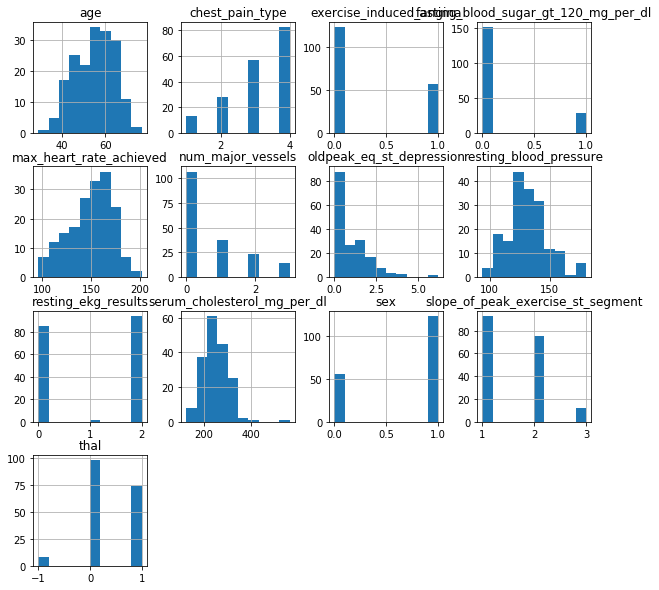

In [34]:
## Looking at the various variables in the raw data
# Look at the summary to see if there are missing values or NAN.. we know here there aren't any
# Lets look at the histogram and boxplot!

# Histogram
df_train_values.hist(figsize=(10,10))
# Variable oldpeak seems to be skewed.
# chest_pain has an increasing trend, bunch of other parameters have negative trend

In [33]:
# Scatter plot
# plotting.scatter_matrix(df_train_values[['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina']],figsize=(10,10))

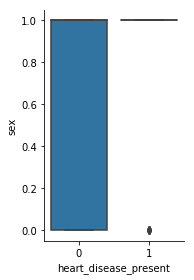

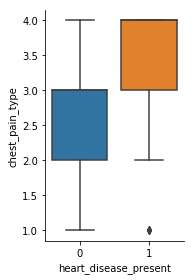

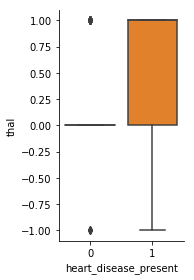

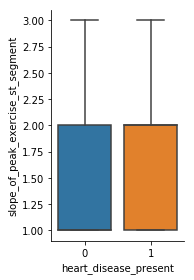

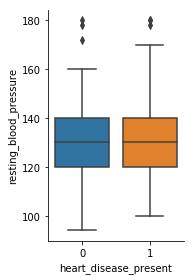

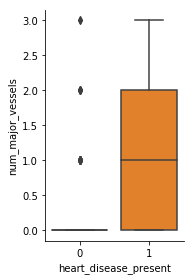

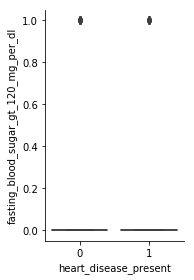

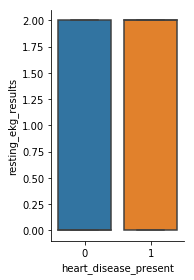

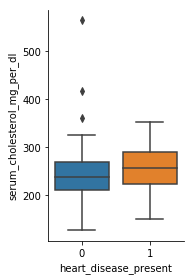

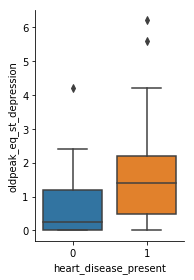

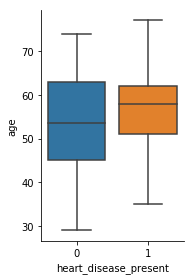

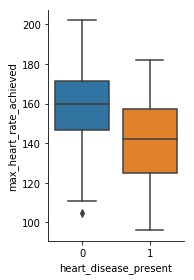

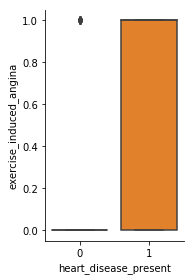

In [53]:
# Boxplot
sns.catplot(x="heart_disease_present", y="sex",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="chest_pain_type",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="thal",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="slope_of_peak_exercise_st_segment",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="resting_blood_pressure",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="num_major_vessels",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="fasting_blood_sugar_gt_120_mg_per_dl",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="resting_ekg_results",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="serum_cholesterol_mg_per_dl",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="oldpeak_eq_st_depression",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="age",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="max_heart_rate_achieved",data=df_train_all,kind="box",height=4, aspect=.7)
sns.catplot(x="heart_disease_present", y="exercise_induced_angina",data=df_train_all,kind="box",height=4, aspect=.7)
# Looking at the boxplot it seems sex, chest_pain_type, thal, num_major_vessels, serum_cholestrol_mg_per_dl,
# oldpeak_eq_st_depression, max_heart_rate_achieved, exercise_induced_angina are the relevant modeling variables 
# that could be a cause of heart_disease_present

In [65]:
# Looking at the boxplot it seems sex, chest_pain_type, thal, num_major_vessels, serum_cholestrol_mg_per_dl,
# oldpeak_eq_st_depression, max_heart_rate_achieved, exercise_induced_angina are the relevant modeling variables 
# that could be a cause of heart_disease_present.

# Creating new dataframe based on the above columns 
df_train_model=df_train_all
df_train_model=df_train_model.drop(["slope_of_peak_exercise_st_segment","resting_blood_pressure","fasting_blood_sugar_gt_120_mg_per_dl","resting_ekg_results","age"], axis=1)
df_train_model.head()

,thal,chest_pain_type,num_major_vessels,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
patient_id,,,,,,,,,
0z64un,0,2,0,308,0.0,1,170,0,0
ryoo3j,0,3,0,214,1.6,0,158,0,0
yt1s1x,0,4,3,304,0.0,1,162,1,1
l2xjde,1,4,0,223,0.0,1,181,0,1
oyt4ek,1,1,0,270,4.2,1,145,0,0


In [ ]:
## Coding for z-score
#theta= np.ones((1,len(df_train_values.columns)-1), dtype=int) # Gives the length   
#w_transp= np.transpose(w)
#w_transp=np.insert(w_transp,0,0, axis=0)
#print(w_transp)
#b=1
#train_values=df_train_values.values
# print(train_values)


## for loop
##z= np.dot(w_transp,train_values)+b
#for count in len(df_train_values.index) 
# for index, row in df_train_values.iterrows()
  # +b, axis=0 
      
 #z[count]=     
# print(df_train_values.loc[1]) # dataframe.loc gets that row
# z=np.transpose(w)*df_train_values[0]
# print(df_train_values.chest_pain_type)

In [164]:
## Rearranging the data
X = df_train_model.iloc[:, :-1] # X is dataframe here
X_all= df_train_all.iloc[:, :-1]
# y = target values, last column of the data frame
y = df_train_model.iloc[:, -1]
y_all = df_train_all.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X] # Changes the datatype of X from Dataframe to numpy array
X=np.delete(X,0,1) #Done to get rid of index which occupied the first column
y = y[:, np.newaxis]
X_all = np.c_[np.ones((X_all.shape[0], 1)), X_all]
X_all=np.delete(X_all,0,1) #Done to get rid of index which occupied the first column
y_all = y_all[:, np.newaxis]
#print(X)

theta = np.zeros((X.shape[1], 1))
theta_all = np.zeros((X_all.shape[1], 1))
#print(theta_all)

In [165]:
## Some functions to define the cost

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

## Defining cost and gradient function 

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]



In [166]:
## Calculating the model coeffs
parameters = fit(X, y, theta)
parameters_all = fit(X_all, y_all, theta_all)
print(parameters_all)

[ 0.37598721  1.05091498  0.00261387  0.56960318  1.02670474 -0.11912767
  0.2393923   0.00345642  0.50394089  1.47976649 -0.04567686 -0.02976833
  1.00971717]


In [168]:
# Calculating accuracy of the model
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100

def predict_all(x):
    theta_all = parameters_all[:, np.newaxis]
    return probability(theta_all, x)
def accuracy_all(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict_all(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy_all = np.mean(predicted_classes == actual_classes)
    return accuracy_all * 100

print(accuracy(X, y.flatten()))
#print(accuracy_all(X_all, y_all.flatten())) # All was 2.22% better than the Model

83.88888888888889


In [276]:
## Applying the developed model to the test data!

df_test_values= pd.read_csv(r'G:\My Drive\Graduate life at UA\Other\DataDriven\HeartDisease\data\test_values.csv')
df_test_values.thal=(thal== 'reversible_defect').astype(int)-(thal== 'fixed_defect').astype(int) # This takes care of what I would do in the above 3 lines in MATLAB
df_test_values.head()

X_test = df_test_values.iloc[:,:] # X_test is Dataframe
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test] # Changes the datatype of X_test from Dataframe to numpy array

X_test=np.delete(X_test,0,1) #Done to get rid of index which occupied the first column
X_test=np.delete(X_test,0,1)
# print(X_test)
parameters_all_array=np.c_[parameters_all] #np.ones((parameters_all.shape[0], 1)),
# print(parameters_all_array)
heart_disease_present_value= np.dot(X_test,parameters_all_array)
#print(heart_disease_present_value)
heart_disease_present_value=np.array(heart_disease_present_value,dtype=np.float32)
#print(heart_disease_present_value)
heart_disease_present_value= sigmoid(heart_disease_present_value)
#print(heart_disease_present_value)

## Converting data to binary
#heart_disease_present_val=np.ones((heart_disease_present_value.shape[0], 1)) # Defining an array of ones
#count=0
#for value in heart_disease_present_value:
    #print(count)
#    if value>0.5:
#        heart_disease_present_val[count]=1
#    else:
#        heart_disease_present_val[count]=0
#    count=count+1
        
print(heart_disease_present_value)

## Converting into final output dataframe
df_heart =  pd.DataFrame(heart_disease_present_value,columns=['heart_disease_present'])
df_heart.head()
test_results=pd.concat([df_test_values["patient_id"], df_heart], axis=1)#, col=[])
test_results.head()
test_results.to_csv(r'G:\My Drive\Graduate life at UA\Other\DataDriven\HeartDisease\output\test_results.csv', index=False)


[[0.06866521]
 [0.06516971]
 [0.9338662 ]
 [0.12181302]
 [0.98684376]
 [0.03699778]
 [0.23571716]
 [0.76895297]
 [0.24021496]
 [0.18267763]
 [0.5068788 ]
 [0.33288312]
 [0.27374703]
 [0.94988054]
 [0.19916227]
 [0.05886339]
 [0.01643775]
 [0.16072   ]
 [0.8685104 ]
 [0.07196629]
 [0.93208975]
 [0.33989   ]
 [0.16675854]
 [0.00190541]
 [0.1671712 ]
 [0.9671076 ]
 [0.12458427]
 [0.1247756 ]
 [0.57546693]
 [0.02734464]
 [0.80575436]
 [0.12911817]
 [0.81637305]
 [0.61495066]
 [0.13215767]
 [0.04044896]
 [0.36694968]
 [0.4993294 ]
 [0.05096787]
 [0.21727005]
 [0.9064098 ]
 [0.02188726]
 [0.8704487 ]
 [0.05259747]
 [0.85741246]
 [0.2037973 ]
 [0.05309551]
 [0.12432446]
 [0.423319  ]
 [0.81001675]
 [0.9565199 ]
 [0.05711411]
 [0.9925862 ]
 [0.0455252 ]
 [0.09187977]
 [0.03458377]
 [0.96462995]
 [0.35187966]
 [0.29936522]
 [0.7117005 ]
 [0.12879156]
 [0.95067877]
 [0.33192977]
 [0.99364686]
 [0.06969368]
 [0.9846139 ]
 [0.8645726 ]
 [0.2666545 ]
 [0.33860803]
 [0.96752566]
 [0.06766012]
 [0.99